# Classification Models with Keras

In [1]:
# To suppress the warning messages due to use of CPU architechture for tensoflow.
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.utils import to_categorical

import matplotlib.pyplot as plt

## Dataset

The Keras library conveniently includes the MNIST dataset as part of its API. The dataset is readily divided into a training set and a test set.

In [ ]:
import ssl
import certifi
import urllib.request

opener = urllib.request.build_opener(
    urllib.request.HTTPSHandler(context=ssl.create_default_context(cafile=certifi.where()))
)
urllib.request.install_opener(opener)

In [25]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [26]:
X_train.shape

(60000, 28, 28)

The first number in the output tuple is the number of images, and the other two numbers are the size of the images in datset. So, each image is 28 pixels by 28 pixels.

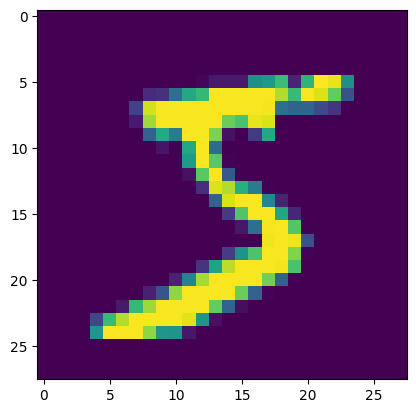

In [27]:
plt.imshow(X_train[0])


With conventional neural networks, we cannot feed in the image as input as is. So we need to flatten the images into one-dimensional vectors, each of size 1 x (28 x 28) = 1 x 784.

In [28]:
num_pixels = X_train.shape[1] * X_train.shape[2]

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

Since pixel values can range from 0 to 255, let's normalize the vectors to be between 0 and 1.

In [29]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

Finally, before we start building our model, remember that for classification we need to divide our target variable into categories. We use the to_categorical function from the Keras Utilities package.


In [30]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


## Build a Neural Network

In [31]:
def classification_model():
    model = Sequential()
    model.add(Input(shape=(num_pixels,)))
    model.add(Dense(num_pixels, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


## Train and Test the Network

In [ ]:
model = classification_model()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)
scores = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/10
1875/1875 - 6s - 3ms/step - accuracy: 0.9440 - loss: 0.1825 - val_accuracy: 0.9659 - val_loss: 0.1098
Epoch 2/10
1875/1875 - 5s - 3ms/step - accuracy: 0.9759 - loss: 0.0783 - val_accuracy: 0.9775 - val_loss: 0.0769
Epoch 3/10
1875/1875 - 5s - 3ms/step - accuracy: 0.9832 - loss: 0.0523 - val_accuracy: 0.9685 - val_loss: 0.1018
Epoch 4/10
1875/1875 - 5s - 3ms/step - accuracy: 0.9871 - loss: 0.0408 - val_accuracy: 0.9775 - val_loss: 0.0693
Epoch 5/10
1875/1875 - 5s - 3ms/step - accuracy: 0.9897 - loss: 0.0318 - val_accuracy: 0.9802 - val_loss: 0.0711
Epoch 6/10
1875/1875 - 5s - 3ms/step - accuracy: 0.9917 - loss: 0.0259 - val_accuracy: 0.9824 - val_loss: 0.0763
Epoch 7/10
1875/1875 - 5s - 3ms/step - accuracy: 0.9919 - loss: 0.0240 - val_accuracy: 0.9766 - val_loss: 0.0997
Epoch 8/10
1875/1875 - 5s - 3ms/step - accuracy: 0.9936 - loss: 0.0193 - val_accuracy: 0.9785 - val_loss: 0.0962
Epoch 9/10
1875/1875 - 5s - 3ms/step - accuracy: 0.9941 - loss: 0.0188 - val_accuracy: 0.9806 - 

In [34]:
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1]))

Accuracy: 0.9771000146865845% 
 Error: 0.022899985313415527


Sometimes, you cannot afford to retrain your model everytime you want to use it, especially if you are limited on computational resources and training your model can take a long time. Therefore, with the Keras library, you can save your model after training. To do that, we use the save method.


In [ ]:
model.save('classification_model.keras')

Since our model contains multidimensional arrays of data, then models are usually saved as .keras files.

When you are ready to use your model again, you use the load_model function from keras.saving.


In [39]:
pretrained_model = keras.saving.load_model('classification_model.keras')

## Exercise 1

Create a neural network model with 6 dense layers and compare its accuracy

In [37]:
model_ex1 = Sequential()
model_ex1.add(Input(shape=(num_pixels,)))
model_ex1.add(Dense(num_pixels, activation='relu'))
model_ex1.add(Dense(100, activation='relu'))
model_ex1.add(Dense(100, activation='relu'))
model_ex1.add(Dense(100, activation='relu'))
model_ex1.add(Dense(100, activation='relu'))
model_ex1.add(Dense(num_classes, activation='softmax'))
model_ex1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_ex1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)
scores_ex1 = model_ex1.evaluate(X_test, y_test, verbose=0)

print('Accuracy 6-layers: {}% \n Error: {}'.format(scores_ex1[1], 1 - scores_ex1[1]))

Epoch 1/10
1875/1875 - 7s - 4ms/step - accuracy: 0.9321 - loss: 0.2236 - val_accuracy: 0.9656 - val_loss: 0.1116
Epoch 2/10
1875/1875 - 6s - 3ms/step - accuracy: 0.9699 - loss: 0.1024 - val_accuracy: 0.9745 - val_loss: 0.0834
Epoch 3/10
1875/1875 - 6s - 3ms/step - accuracy: 0.9790 - loss: 0.0710 - val_accuracy: 0.9723 - val_loss: 0.0973
Epoch 4/10
1875/1875 - 6s - 3ms/step - accuracy: 0.9836 - loss: 0.0571 - val_accuracy: 0.9806 - val_loss: 0.0718
Epoch 5/10
1875/1875 - 6s - 3ms/step - accuracy: 0.9860 - loss: 0.0464 - val_accuracy: 0.9782 - val_loss: 0.0806
Epoch 6/10
1875/1875 - 6s - 3ms/step - accuracy: 0.9886 - loss: 0.0403 - val_accuracy: 0.9802 - val_loss: 0.0775
Epoch 7/10
1875/1875 - 6s - 3ms/step - accuracy: 0.9898 - loss: 0.0352 - val_accuracy: 0.9839 - val_loss: 0.0650
Epoch 8/10
1875/1875 - 6s - 3ms/step - accuracy: 0.9912 - loss: 0.0308 - val_accuracy: 0.9775 - val_loss: 0.1024
Epoch 9/10
1875/1875 - 6s - 3ms/step - accuracy: 0.9926 - loss: 0.0278 - val_accuracy: 0.9821 - 

## Exercise 2

Now, load the the earlier saved model, train it further for 10 more epochs and check the accuracy

In [41]:
pretrained_model = keras.saving.load_model('classification_model.keras')
pretrained_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, verbose=2)

scores_20_epochs = pretrained_model.evaluate(X_test, y_test, verbose=0)

print('Accuracy_10_epochs: {}% \n Accuracy_20_epochs: {}'.format(scores[1], scores_20_epochs[1]))  

Epoch 1/20
1875/1875 - 5s - 3ms/step - accuracy: 0.9957 - loss: 0.0138 - val_accuracy: 0.9838 - val_loss: 0.0797
Epoch 2/20
1875/1875 - 5s - 3ms/step - accuracy: 0.9954 - loss: 0.0147 - val_accuracy: 0.9834 - val_loss: 0.1010
Epoch 3/20
1875/1875 - 5s - 3ms/step - accuracy: 0.9958 - loss: 0.0135 - val_accuracy: 0.9777 - val_loss: 0.1083
Epoch 4/20
1875/1875 - 5s - 3ms/step - accuracy: 0.9964 - loss: 0.0116 - val_accuracy: 0.9832 - val_loss: 0.0941
Epoch 5/20
1875/1875 - 5s - 3ms/step - accuracy: 0.9967 - loss: 0.0111 - val_accuracy: 0.9836 - val_loss: 0.0961
Epoch 6/20
1875/1875 - 5s - 3ms/step - accuracy: 0.9965 - loss: 0.0124 - val_accuracy: 0.9819 - val_loss: 0.1095
Epoch 7/20
1875/1875 - 5s - 3ms/step - accuracy: 0.9966 - loss: 0.0123 - val_accuracy: 0.9815 - val_loss: 0.1193
Epoch 8/20
1875/1875 - 5s - 3ms/step - accuracy: 0.9973 - loss: 0.0091 - val_accuracy: 0.9830 - val_loss: 0.1099
Epoch 9/20
1875/1875 - 5s - 3ms/step - accuracy: 0.9973 - loss: 0.0099 - val_accuracy: 0.9823 - 